# Phish Email Identification using ML based Classification tools

### Importing libraries and defining constants

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
from sklearn.linear_model import LogisticRegression

In [124]:
#cols = ["Label", "EmailText"]
phish = pd.read_csv('phish.csv')

In [125]:
#phish.loc[:,~phish.columns.str.match("Unnamed")]
phish.head()

,Label,EmailText,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,phish,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [126]:
#Checking the shape of the dataset
phish.shape

(5572, 5)

In [127]:
# load the datasets
phishing = (phish["Label"]=='phish').sum()
print("Number of phishing mails: ",phishing)
ham = (phish["Label"]=='ham').sum()
print("Number of ham mails: ",ham)

Number of phishing mails:  747
Number of ham mails:  4825


### Word Cloud Analysis

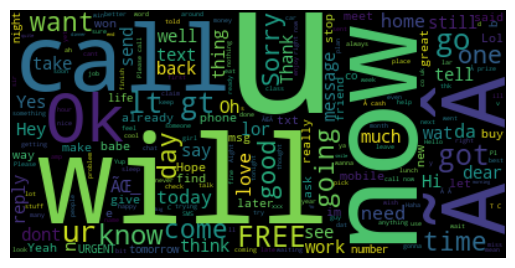

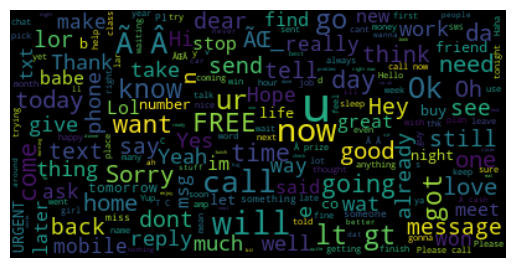

In [128]:
import csv
from wordcloud import WordCloud


#read first column of csv file to string of words seperated
#by tab

your_list = []
with open('phish_mails.csv', "rt", encoding='utf-8') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[0] for i in reader])


# Generate a word cloud image
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()
# source : questions/46202600/creating-word-cloud-in-python-from-column-in-csv-file

In [129]:
x = phish['EmailText']
y = phish["Label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [130]:
# mails = x_train.copy(deep=True)
# mails['EmailText'] =  pd.Series(y_train, index=mails.index)

# mails.describe()

phish.Label.value_counts(normalize=True)

ham      0.865937
phish    0.134063
Name: Label, dtype: float64

In [131]:
phish.EmailText.value_counts(normalize=True)

Sorry, I'll call later                                                                                                                                                 0.005384
I cant pick the phone right now. Pls send a message                                                                                                                    0.002154
Ok...                                                                                                                                                                  0.001795
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"              0.000718
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...    0.000718
                                                                                                                        

### Visualizing the data

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [132]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
#Loading the data
url = pd.read_csv('urldata.csv')
url.head(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


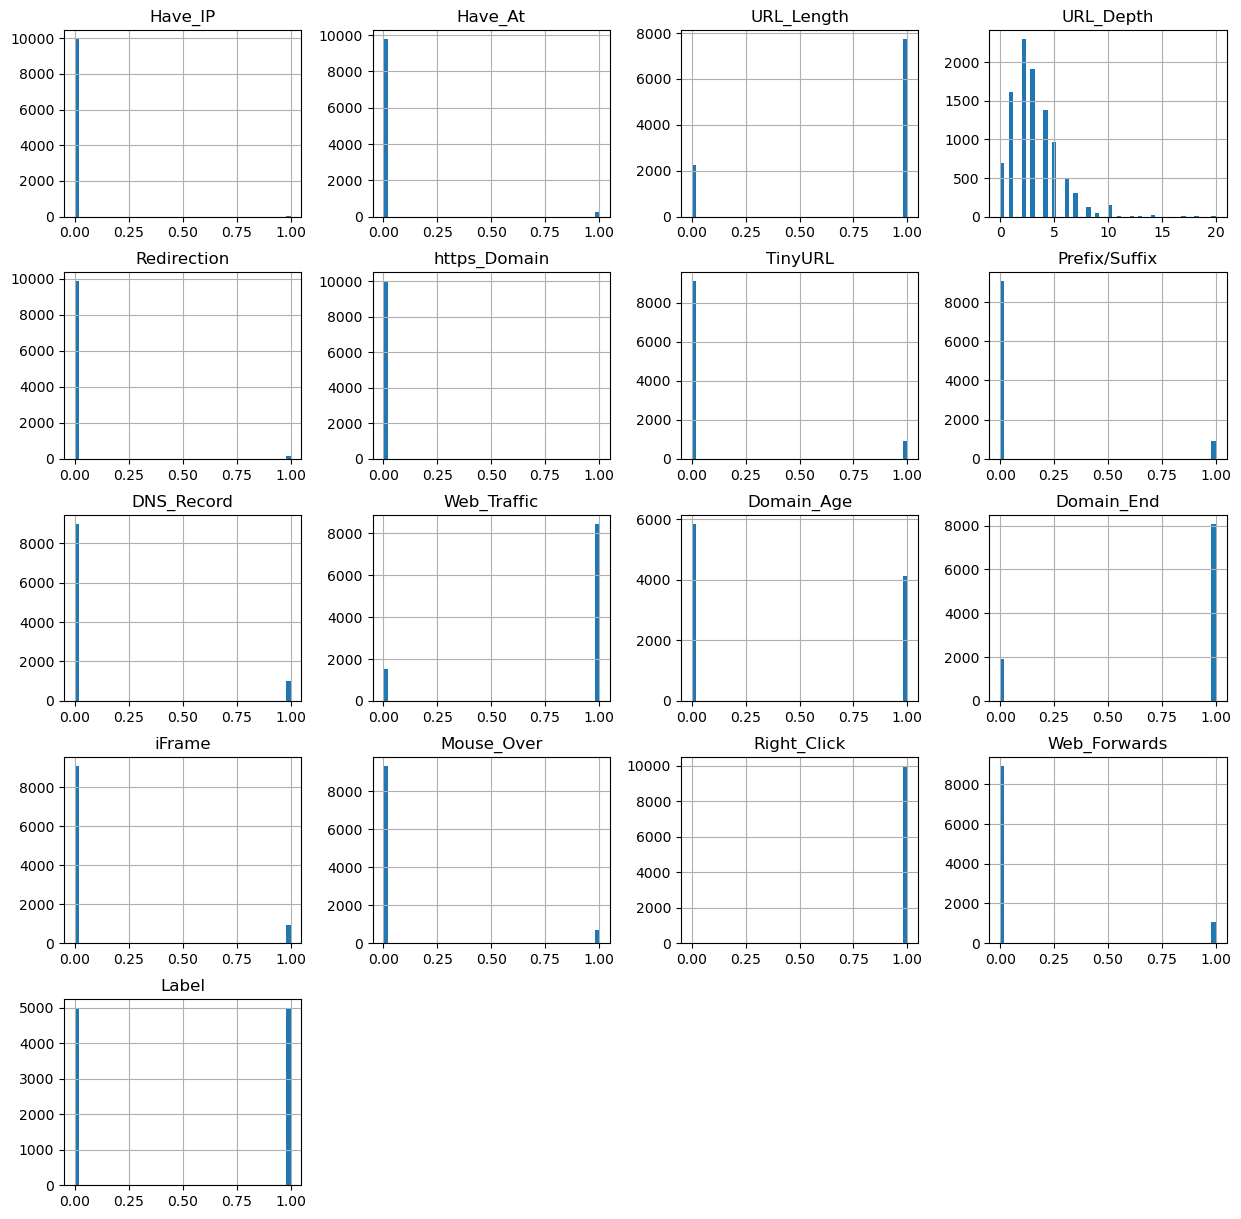

In [134]:
#Plotting the data distribution
url.hist(bins = 50,figsize = (15,15))
plt.show()

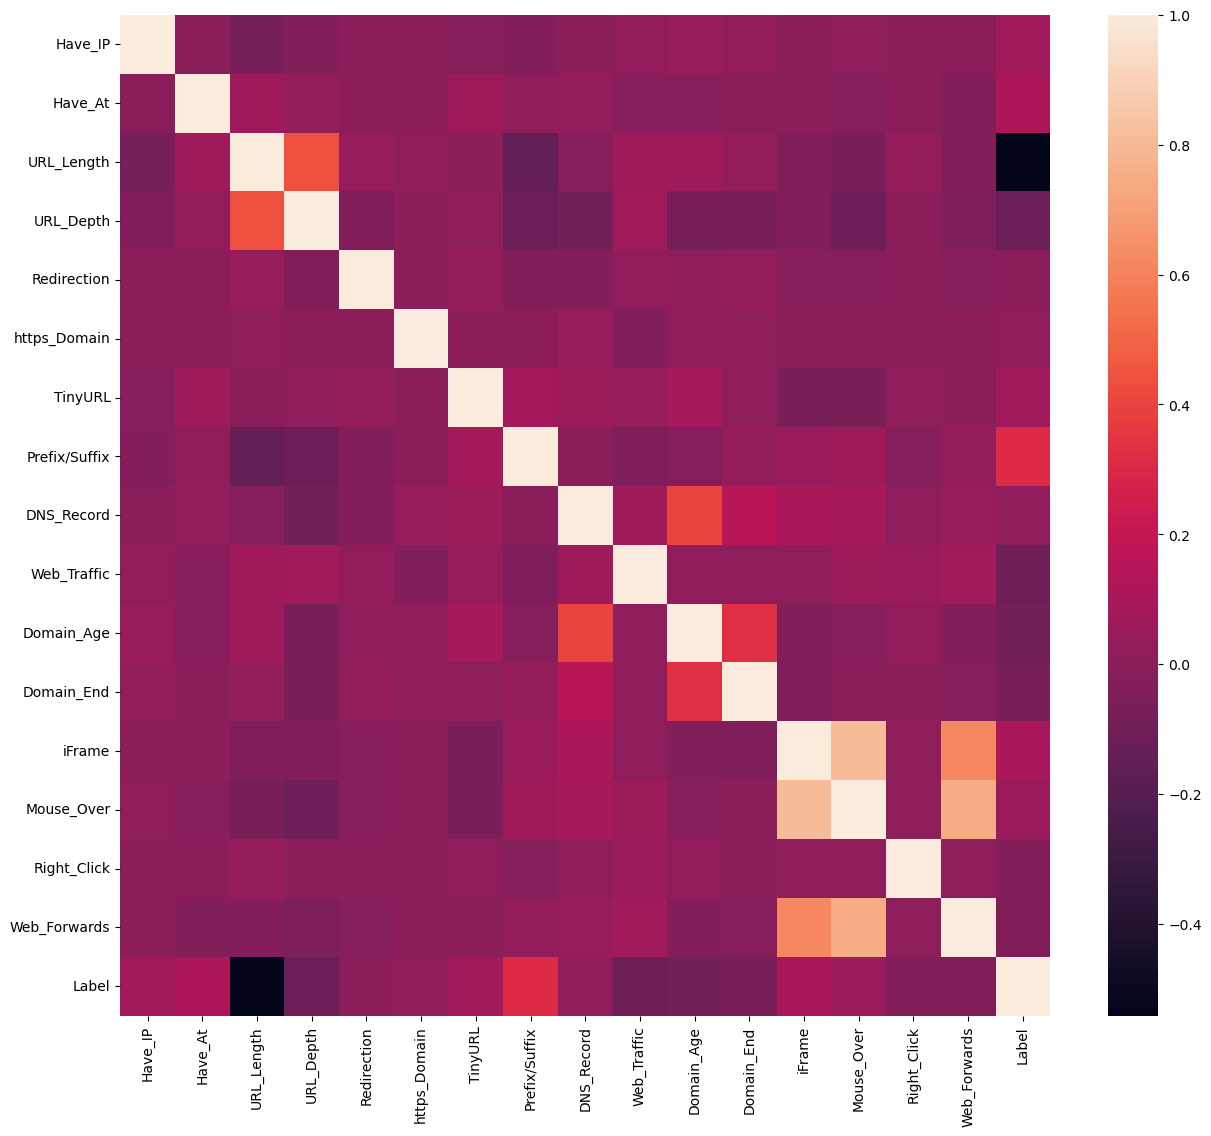

In [135]:
# Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(url.corr())
plt.show()

Text(0, 0.5, 'classes')

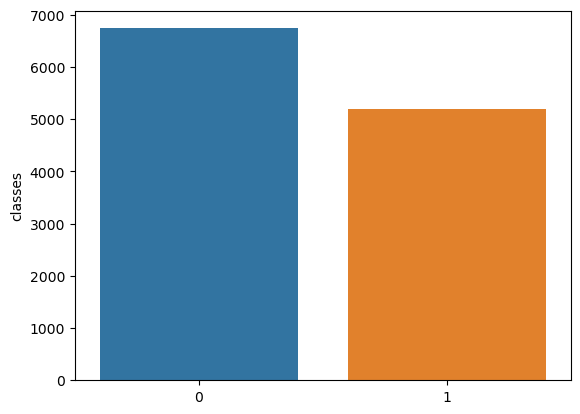

In [136]:
df = pd.read_excel('phishing_email_.xlsx')
data=df.Class.value_counts()

#"ham = 0","phishing = 1"
sns.barplot(x=data.index,y=data)
plt.gca().set_ylabel('classes')

## Data Cleaning and Processing

In [137]:
# Remove email address if in text

import re

def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', '',x)
    
def check_for_emails(x):
    return 1 if len(re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)) else 0

def check_for_urls(x):
    return 1 if len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)) else 0

def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', " ", x)
    x = ' '.join(x.split())
    return x


In [138]:
df['Text']=df['Text'].astype(str)

In [139]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [140]:
df = df[df.Text.str.len() > 30]

In [141]:
df['Has_Email'] = df['Text'].apply(lambda x: check_for_emails(x))

In [142]:
df['Has_URL'] = df['Text'].apply(lambda x: check_for_urls(x))

In [143]:
df['Text'] = df['Text'].apply(lambda x: remove_special_chars(x))

In [144]:
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [145]:
df['Text_Length'] = df['Text'].apply(lambda x: len(x))

## Spliting the data 

In [146]:
X = df.drop(['Class', 'Has_Email','Has_URL', 'Text_Length'], 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

C:\Users\Keshav Raturi\AppData\Local\Temp\ipykernel_7140\1196881634.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['Class', 'Has_Email','Has_URL', 'Text_Length'], 1)


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9116 entries, 0 to 11928
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         9116 non-null   object
 1   Class        9116 non-null   int64 
 2   Has_Email    9116 non-null   int64 
 3   Has_URL      9116 non-null   int64 
 4   Text_Length  9116 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 427.3+ KB


## Machine Learning Models

In [148]:
#Model Select
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from mlxtend.plotting import plot_confusion_matrix

In [149]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a):
  ML_Model.append(model)
  acc_test.append(round(a, 3))


In [150]:
x = phish['EmailText']
y = phish["Label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [151]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

## Support Vector Machine

In [152]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [153]:
features_test = cv.transform(x_test)
print("SVM Accuracy: {}".format(model.score(features_test,y_test)))

SVM Accuracy: 0.9775784753363229


In [154]:
storeResults('Support Vector Machine',model.score(features_test,y_test) )

## Logistic Regression

In [155]:
model = LogisticRegression()
model.fit(features,y_train)

LogisticRegression()

In [156]:
features_test = cv.transform(x_test)
print("LR Accuracy: {}".format(model.score(features_test,y_test)))

LR Accuracy: 0.9811659192825112


In [157]:
storeResults('Logistic Regression',model.score(features_test,y_test) )

## Random Forest Classifier

In [158]:
model =  RandomForestClassifier()
model.fit(features,y_train)

RandomForestClassifier()

In [159]:
features_test = cv.transform(x_test)
print("RF Accuracy: {}".format(model.score(features_test,y_test)))

RF Accuracy: 0.9748878923766816


In [160]:
storeResults('Random Forest Classifier',model.score(features_test,y_test) )

## Decision Tree Classifier

In [161]:
model =  DecisionTreeClassifier()
model.fit(features,y_train)

DecisionTreeClassifier()

In [162]:
features_test = cv.transform(x_test)
print("DT Accuracy: {}".format(model.score(features_test,y_test)))

DT Accuracy: 0.9757847533632287


In [163]:
storeResults('Decision Tree Classifier',model.score(features_test,y_test) )

## Performance Evaluation:

In [165]:

#Dropping the Domain column
data = url.drop(['Domain'], axis = 1).copy()
     
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((8000, 16), (2000, 16))

In [166]:
#Dropping the Domain column in Url Data
data = url.drop(['Domain'], axis = 1).copy()

# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
     

DecisionTreeClassifier(max_depth=5)

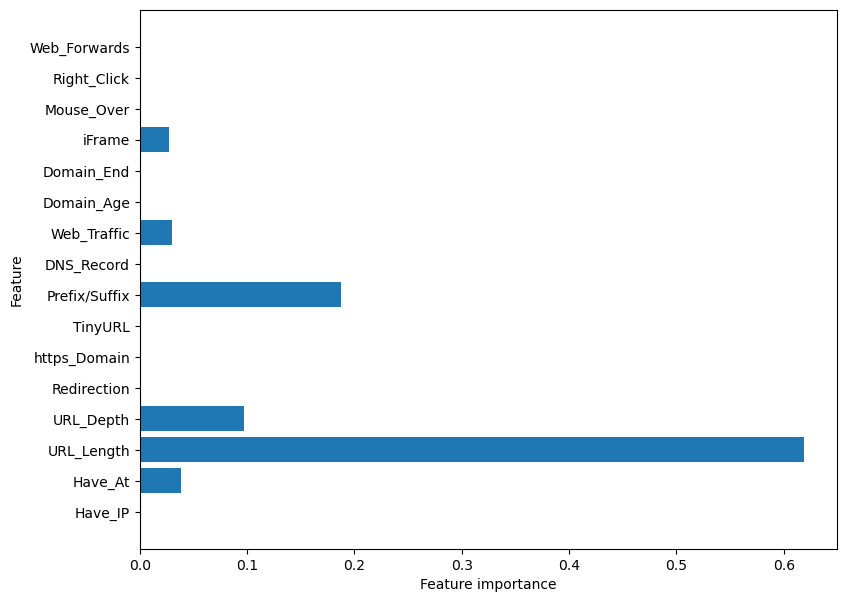

In [167]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Comparision of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [168]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model, 
    'Accuracy': acc_test})
results

,ML Model,Accuracy
0,Support Vector Machine,0.978
1,Logistic Regression,0.981
2,Random Forest Classifier,0.975
3,Decision Tree Classifier,0.976


In [169]:
#Sorting the datafram on accuracy
results.sort_values(by=['Accuracy'], ascending=False)

,ML Model,Accuracy
1,Logistic Regression,0.981
0,Support Vector Machine,0.978
3,Decision Tree Classifier,0.976
2,Random Forest Classifier,0.975


## References

References

[1] https://blog.keras.io/building-autoencoders-in-keras.html

[2] https://en.wikipedia.org/wiki/Autoencoder

[3] https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/

[4] https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/
